python3 SpikeCounter/cluster/run_preprocess_stim_jobs2.py /n/holyscratch01/cohen_lab/bjia/20230312_cmlc2_LOI None --remove_from_start 0 --remove_from_end 0 --n_pcs=40 --scale_factor=4 --skewness_threshold 0 --denoise 0 --decorrelate 0 --pb_correct_method monoexp > jobs3.txt

python3 SpikeCounter/cluster/run_sta_snapt_jobs.py /n/holyscratch01/cohen_lab/bjia/20230312_cmlc2_LOI/ --subfolder corrected --sta_after_s 3.5 --sta_before_s 1.5 --stim_channel None > jobs3.txt

python3 SpikeCounter/cluster/dcimg_folders_to_expt_data.py /n/holyscratch01/cohen_lab/bjia/20230312_cmlc2_LOI/Snaps --is_folder 0

In [1]:
import sys
from pathlib import Path
import os
import warnings
import time
SPIKECOUNTER_PATH = os.getenv("SPIKECOUNTER_PATH")
ANAYLSIS_OUTPUT_ROOTDIR = os.getenv("ANALYSIS_OUTPUT_ROOTDIR")
DATA_ROOTDIR = os.getenv("DATA_ROOTDIR")
sys.path.append(SPIKECOUNTER_PATH)
import matplotlib as mpl
from matplotlib import patches, colors
import colorcet as cc
from cycler import cycler

import numpy as np
import skimage.io as skio
from scipy import ndimage, signal, stats, fft, interpolate, optimize
from skimage import exposure, measure, filters, transform, morphology
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statannotations.Annotator import Annotator

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import randomized_svd
import mat73
import pandas as pd
import parse
import pickle

from spikecounter.analysis import traces, images
from spikecounter.analysis import stats as sstats
from spikecounter.ui import visualize, HyperStackViewer
from spikecounter import utils

warnings.filterwarnings("once")
plt.style.use(
    os.path.join(os.getenv("SPIKECOUNTER_PATH"), "config", "bio_publications.mplstyle")
)
ss = StandardScaler()

In [12]:
file_names = ["082104P1UR_F1_crop_20Hz", "085947P1UL_D3_20Hz", "085521P1UL_B2_20Hz"]
expt_name = "20230323_simultaneous_calcium_voltage"
rootdir = Path(DATA_ROOTDIR, expt_name)

scalebar_params = {
    "corner_x": -2,
    "corner_y": 0.18,
    "time_scale": 5,
    "ampl_scale": 0.1,
    "thickness": 0.01,
    "xlabel_offset_x": 0,
    "xlabel_offset_y": 0.02,
    "ylabel_offset_y": 0.02,
    "ylabel_offset_x": -5,
    "fontsize": 9
}

scalebar_params2 = {
    "corner_x": -0.9,
    "corner_y": 0.16,
    "time_scale": 1,
    "ampl_scale": 0.085,
    "thickness": 0.005,
    "xlabel_offset_x": 0,
    "xlabel_offset_y": 0.01,
    "ylabel_offset_y": 0.02,
    "ylabel_offset_x": -0.8,
    "fontsize": 9
}

scalebar_params3 = {
    "corner_x": -0.9,
    "corner_y": 0.1,
    "time_scale": 1,
    "ampl_scale": 0.05,
    "thickness": 0.003,
    "xlabel_offset_x": 0,
    "xlabel_offset_y": 0.005,
    "ylabel_offset_y": 0.01,
    "ylabel_offset_x": -0.85,
    "fontsize": 9
}

/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(
/tmp/ipykernel_62954/338377628.py:27: UserWarning: /n/holyscratch01/cohen_lab/bjia/20230323_simultaneous_calcium_voltage/analysis/082104P1UR_F1_crop_20Hz/082104P1UR_F1_crop_20Hz_PC1_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skio.imsave(analysis_dir/f"{file_name}_PC1_mask.tif", pc1_mask)
/tmp/ipykernel_62954/338377628.py:28: UserWarning: /n/holyscratch01/cohen_lab/bjia/20230323_simultaneous_calcium_volta

$10\%$
$\Delta F/F$
$8\%$
$\Delta F/F$


/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/numpy/lib/shape_base.py:379: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))
/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_62954/338377628.py:81: UserWarning: /net/fs-cohen01/srv/export/cohen_lab/share/Lab/Papers/2022 First Heartbeat_Submitted/Figures/Data/Figure3/20230323_simultaneous_calcium_voltage/082104P1UR_F1_crop_20Hz/spline_smoothed_vid_v.tif is a low contrast image
  skio.imsave(output_datadir/"spline_smoothed_vid_v.tif", smoothed_vid)
/tmp/ipykernel_62954/338377628.py:82: UserWarning: /net

$5\%$
$\Delta F/F$


/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/numpy/lib/shape_base.py:379: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))
/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_62954/338377628.py:81: UserWarning: /net/fs-cohen01/srv/export/cohen_lab/share/Lab/Papers/2022 First Heartbeat_Submitted/Figures/Data/Figure3/20230323_simultaneous_calcium_voltage/085947P1UL_D3_20Hz/spline_smoothed_vid_v.tif is a low contrast image
  skio.imsave(output_datadir/"spline_smoothed_vid_v.tif", smoothed_vid)
/tmp/ipykernel_62954/338377628.py:82: UserWarning: /net/fs-c

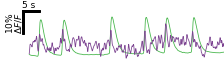

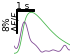

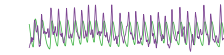

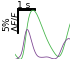

In [4]:
ylims_ca = [(0, 0.2), (0, 0.11)]
ylims_v =  [(0.001, 0.003), (0.001, 0.0043)]
plt.close("all")
for idx, file_name in enumerate(file_names):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    
    metadata = utils.load_video_metadata(rootdir, file_name)
    dt_dict, t = utils.traces_to_dict(metadata)
    
    v_dFF = skio.imread(analysis_dir/f"{file_name}_v_dFF_smoothed.tif")
    ca_dFF = skio.imread(analysis_dir/f"{file_name}_ca_dFF_smoothed.tif")
    t = t[1:1+v_dFF.shape[0]]
    dt = np.mean(np.diff(t))
    
    rd = ca_dFF.reshape(ca_dFF.shape[0], -1).T
    u, s, v = randomized_svd(rd, n_components=15)
    pc1 = np.abs(u[:, 0].reshape(ca_dFF.shape[1:]))
    pc1_mask = pc1 > filters.threshold_otsu(pc1)
    skio.imsave(analysis_dir/f"{file_name}_PC1_mask.tif", pc1_mask)
    skio.imsave(analysis_dir/f"{file_name}_PC1_img.tif", pc1)

    ca_trace = images.extract_mask_trace(ca_dFF, pc1_mask)
    v_trace = images.extract_mask_trace(v_dFF, pc1_mask)
    
    fig1, ax1 = plt.subplots(figsize=(4,1))
    ax1.plot(t, ca_trace, color="#44B549")
    ax2 = ax1.twinx()
    ax2.plot(t, v_trace-0.001, color="#7C4491")
    ax1.set_xlim(-8, 55)
    ax1.set_ylim(-0.04, 0.19)
    ax2.set_ylim(-0.001, 0.0025)
    
    if idx == 0:
        visualize.plot_scalebars(ax1, scalebar_params, pct_f = True)
    ax1.set_axis_off()
    ax2.set_axis_off()
    plt.savefig(output_datadir/f"../example_dual_trace{idx+1}.svg")
    
    if idx == 2:
        continue
    
    sta = skio.imread(analysis_dir/f"{file_name}_ca_triggered_sta.tif")
    dt = np.mean(np.diff(t))
    sta_trace_v = images.extract_mask_trace(sta[:,1], pc1_mask).astype(float)
    sta_trace_c = images.extract_mask_trace(sta[:,0], pc1_mask).astype(
        float
    )
    sta_time = np.arange(sta_trace_v.shape[0])*dt - 2
    fig1, ax1 = plt.subplots(figsize=(1, 1))
    ax1.plot(sta_time, sta_trace_c, color="#44B549")
    ax2 = ax1.twinx()
    ax2.plot(sta_time, sta_trace_v, color="#7C4491")
    ax1.set_xlim(-1, 2)
    ax1.set_ylim(ylims_ca[idx])
    ax2.spines["right"].set_visible(True)
    ax1.spines["top"].set_visible(True)
#     ax1.set_xticks([0, 1.5])
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel(r"$\mathrm{Ca^{2+}}\ \Delta F/F$ (%)")
    ax2.set_ylabel(r"$\mathrm{V_{mem}}\ \Delta F/F$ (%)")
    ax2.set_ylim(ylims_v[idx])
    ax2.set_axis_off()
#     ax2.set_yticks([0.1, 0.2])
    if idx == 0:
        visualize.plot_scalebars(ax1, scalebar_params2, pct_f = True)
    else:
        visualize.plot_scalebars(ax1, scalebar_params3, pct_f = True)

    plt.savefig(output_datadir/f"../example_sta{idx+1}.svg")
    
    beta, smoothed_vid = images.spline_timing(transform.downscale_local_mean(sta[int(0.5/dt):int(4/dt),1], (1,2,2)),
                                            s=0.05, n_knots=15)
    skio.imsave(output_datadir/"spline_smoothed_vid_v.tif", smoothed_vid)
    skio.imsave(output_datadir/f"../{file_name}_spline_smoothed_vid_v.tif", smoothed_vid)
    np.savez(output_datadir/f"../{file_name}_snapt_v.npz",\
                         beta=beta)
    
    beta, smoothed_vid = images.spline_timing(transform.downscale_local_mean(sta[int(0.5/dt):int(4/dt),0], (1,2,2)),
                                            s=0.05, n_knots=15)
    skio.imsave(output_datadir/"spline_smoothed_vid_ca.tif", smoothed_vid)
    skio.imsave(output_datadir/f"../{file_name}_spline_smoothed_vid_ca.tif", smoothed_vid)
    np.savez(output_datadir/f"../{file_name}_snapt_ca.npz",\
                         beta=beta)
# os.makedirs(analysis_dir, exist_ok=True)

Make nice video for display

In [6]:
utils.reload_libraries(images)

In [12]:
for idx, file_name in enumerate(file_names[:2]):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    
    metadata = utils.load_video_metadata(rootdir, file_name)
    dt_dict, t = utils.traces_to_dict(metadata)
    dt = np.mean(np.diff(t))
    sta = skio.imread(output_datadir/f"{file_name}_ca_triggered_sta.tif")
    pc1 = transform.downscale_local_mean(skio.imread(output_datadir/f"{file_name}_PC1_ca.tif"), (2,2))
    pc1_mask = skio.imread(output_datadir/f"{file_name}_PC1_ca_mask.tif")[::2,::2]
    
    beta, smoothed_vid_v = images.spline_timing(transform.downscale_local_mean(sta[int(0.5/dt):int(4/dt),1], (1,2,2)),
                                        s=0.05, n_knots=15, upsample_rate=5)
    beta, smoothed_vid_ca = images.spline_timing(transform.downscale_local_mean(sta[int(0.5/dt):int(4/dt),0], (1,2,2)),
                                        s=0.05, n_knots=15, upsample_rate=5)
    smoothed_vid_v -= smoothed_vid_v.mean(axis=0)
    v_sta_apod = np.copy(smoothed_vid_v)
    v_sta_apod -= np.percentile(v_sta_apod, 5, axis=0)
    v_sta_apod[v_sta_apod < 0] = 0
    v_sta_apod[:, ~pc1_mask.astype(bool)] = 0
    v_sta_smoothed = ndimage.gaussian_filter(v_sta_apod,(0,1,1))
    v_sta_apod = ndimage.gaussian_filter(v_sta_apod, (0,7.5,7.5))
    v_sta_combined = v_sta_smoothed*pc1_mask[None,:,:] + v_sta_apod*~pc1_mask[None,:,:]
    ca_pc1_structure = pc1 * np.ones((v_sta_combined.shape[0], 1, 1))
    skio.imsave(output_datadir.parent/f"{file_name}_dual_voltage_calcium_ca.tif", 
                exposure.rescale_intensity(smoothed_vid_ca, out_range=np.uint16))
    skio.imsave(output_datadir.parent/f"{file_name}_dual_voltage_calcium_v.tif", 
                exposure.rescale_intensity(v_sta_combined, out_range=np.uint16))
    skio.imsave(output_datadir.parent/f"{file_name}_dual_voltage_calcium_struct.tif",
               exposure.rescale_intensity(ca_pc1_structure, out_range=np.uint16))

In [29]:
file_name = "082104P1UR_F1_crop_20Hz"
rootdir = Path(DATA_ROOTDIR, expt_name)
output_datadir = Path(
    ANAYLSIS_OUTPUT_ROOTDIR,
    "2022 First Heartbeat_Submitted",
    "Figures/Data/Figure3/",
    expt_name,
    file_name,
)
sta = skio.imread(output_datadir/f"{file_name}_ca_triggered_sta.tif")
pc1 = skio.imread(output_datadir/f"{file_name}_PC1_ca.tif")
pc1_mask = skio.imread(output_datadir/f"{file_name}_PC1_ca_mask.tif")

In [31]:
v_sta = sta[:, 1]

In [32]:
v_sta -= v_sta.mean(axis=0)

In [33]:
v_sta_apod = np.copy(v_sta)
v_sta_apod[:, ~pc1_mask.astype(bool)] = 0

In [34]:
v_sta_apod -= v_sta_apod.min(axis=0)
v_sta_smoothed = ndimage.gaussian_filter(v_sta_apod,(1,2,2))
v_sta_apod = ndimage.gaussian_filter(v_sta_apod, (1,15,15))

In [35]:
v_sta_combined = v_sta_smoothed*pc1_mask[None,:,:] + v_sta_apod*~pc1_mask[None,:,:]

In [36]:
ca_pc1_structure = pc1 * np.ones((sta.shape[0], 1, 1))

In [37]:
sta_display = np.stack(
    [exposure.rescale_intensity(sta[:,0], out_range=np.uint16),
    exposure.rescale_intensity(v_sta_apod, out_range=np.uint16),
    exposure.rescale_intensity(ca_pc1_structure, out_range=np.uint16)],
    axis=1
)

In [38]:
skio.imsave(output_datadir.parent/f"{file_name}_dual_voltage_calcium_ca.tif", sta_display[:,0])
skio.imsave(output_datadir.parent/f"{file_name}_dual_voltage_calcium_v.tif", exposure.rescale_intensity(v_sta_combined, out_range=np.uint16))
skio.imsave(output_datadir.parent/f"{file_name}_dual_voltage_calcium_struct.tif", sta_display[:,2])

Activation maps

/tmp/ipykernel_218945/2688510973.py:31: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  mask = morphology.binary_dilation(mask,


amplitude


/n/home11/bjia/SpikeCounter/spikecounter/analysis/images.py:1065: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p, res, _, _ = np.linalg.lstsq(A, b)


(504.97714, 269.59607, 114, 80, 113, 81)
amplitude
(557.29004, 466.85983, 142, 127, 142, 127)
amplitude
(426.93677, 261.86932, 47, 141, 44, 133)
amplitude
(916.65314, 552.18665, 44, 136, 44, 136)


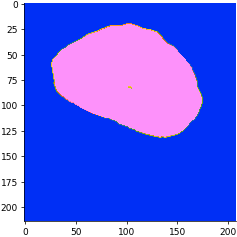

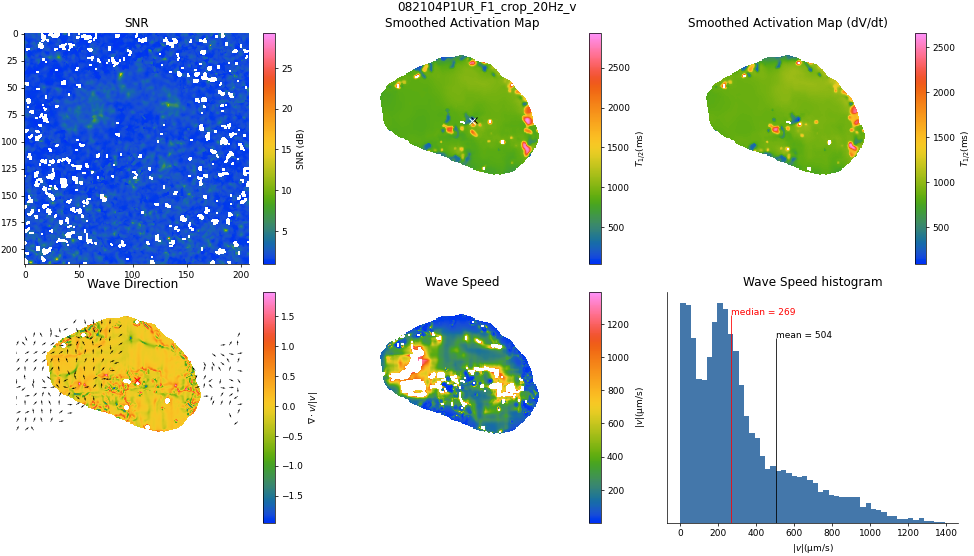

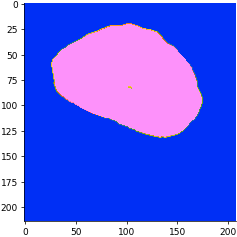

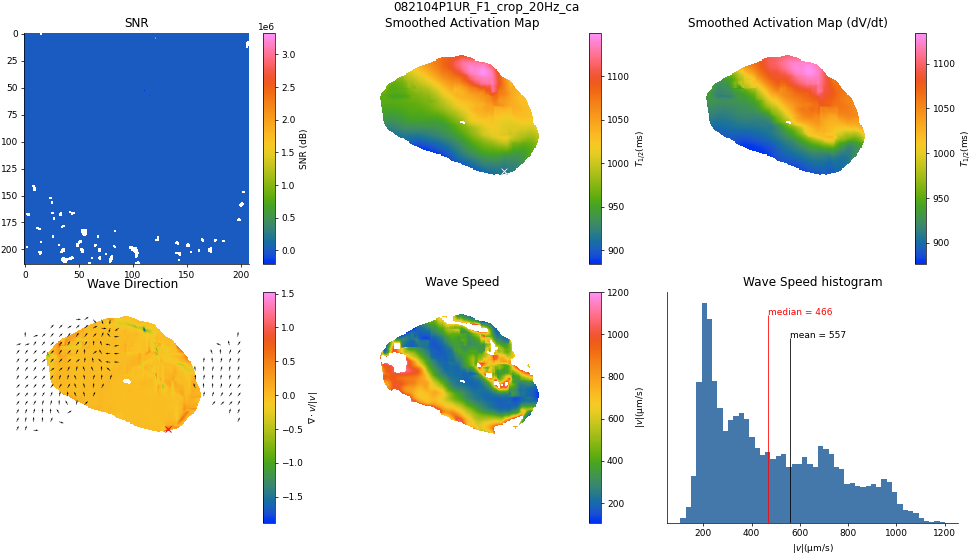

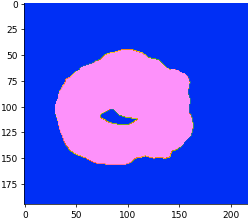

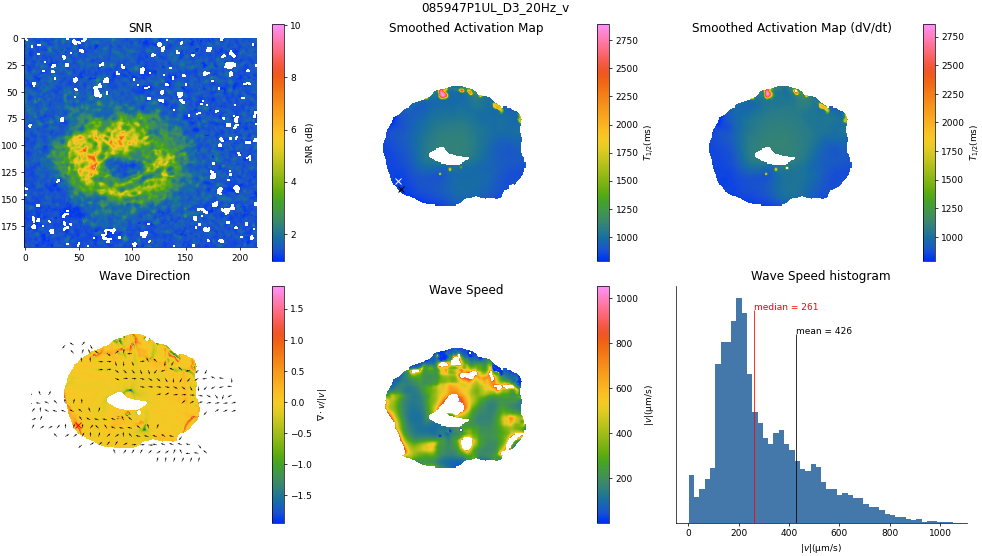

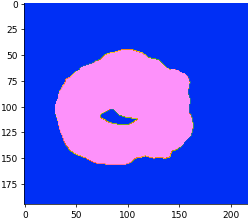

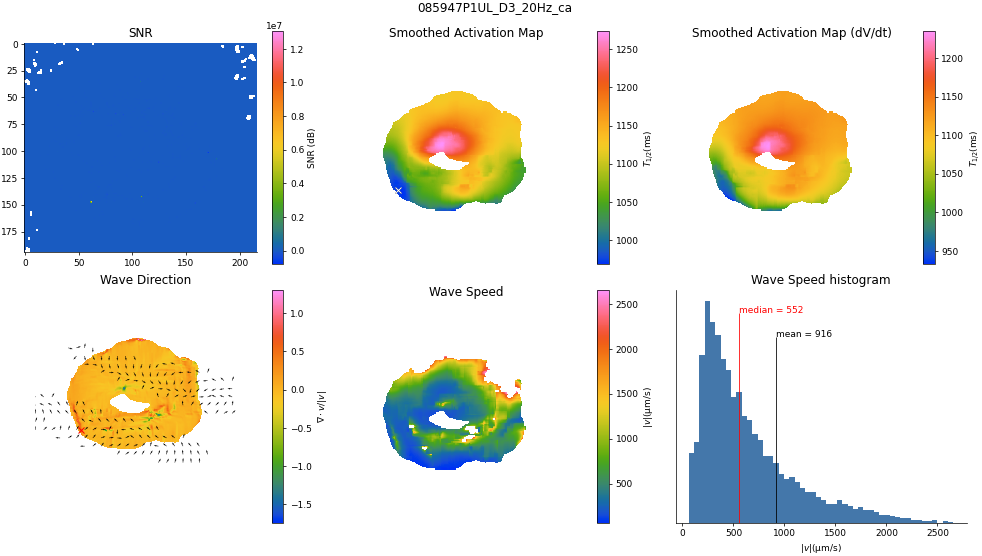

In [40]:
data = []
mint = []
maxdiv = []
erred_files = {}
smoothed_ts = {}
smoothed_ts_dv = {}
amplitudes = {}
divergences = {}
velocities = {}
plt.close("all")
um_per_px = 0.265*4
for idx, file_name in enumerate(file_names):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    for tag in ["v", "ca"]:
        snapt = f"{file_name}_snapt_{tag}.npz"
        if snapt in os.listdir(output_datadir/"../"):
            metadata = utils.load_video_metadata(rootdir, file_name)
            ddict, t = utils.traces_to_dict(metadata)
            dt = np.mean(np.diff(t))
            beta = np.load(output_datadir/f"../{snapt}")["beta"]
            mask = transform.downscale_local_mean(skio.imread(analysis_dir/f"{file_name}_PC1_mask.tif"),
                                                  (2,2)).astype(bool)
            mask = morphology.binary_dilation(mask, 
                            selem=morphology.disk(5))
            fig1, ax1 = plt.subplots(figsize=(4,4))
            ax1.imshow(mask)
            try:
    #             amplitude = (np.abs(beta[2] - 1)/beta[5])**2 #SNR
    #             db = 20*np.log10(amplitude)
    #             db[db < 0] = np.nan
                q = images.analyze_wave_dynamics(beta, dt, um_per_px,
                                                 deltax=13, threshold_mode="amplitude",
                                                 valid_mask=mask, t_pctile_cutoffs=(1,95))
                if q is None:
                    continue
                else:
                    rd, Tsmoothed, Tsmoothed_dv, divergence, v = q
                rowdata = rd
                data.append(rowdata)
                print(rowdata)
            except Exception as e:
                raise e
                print(e)
                erred_files[file_name] = e
                continue

            smoothed_ts[f"{file_name}_{tag}"] = Tsmoothed_dv
            amplitudes[f"{file_name}_{tag}"] = beta[2]
            divergences[f"{file_name}_{tag}"] = divergence
            velocities[f"{file_name}_{tag}"] = v
            visualize.plot_wave_analysis(beta[2], rd, Tsmoothed, Tsmoothed_dv,\
                               divergence, v, f"{file_name}_{tag}")
            plt.savefig(analysis_dir/f"waveplots_{tag}.svg", dpi=300)
            plt.savefig(output_datadir/f"waveplots_{tag}.svg", dpi=300)

In [ ]:
p0 = 5
p1 = 94
vmax = 400
for idx, file_name in enumerate(file_names):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    pc_img = skio.imread(analysis_dir/f"{file_name}_PC1_img.tif")
    pc_img = transform.downscale_local_mean(pc_img, (2,2))
    print(pc_img.shape)
    activation_map = smoothed_ts[file_name]
    finite_mask = np.isfinite(activation_map)
    fv = activation_map[finite_mask]
    min_cutoff, max_cutoff = np.percentile(fv, [p0, p1])
    print(max_cutoff - min_cutoff)
    Tsmoothed_apod = activation_map - min_cutoff
    Tsmoothed_apod[Tsmoothed_apod < 0] = np.nan
    Tsmoothed_apod[Tsmoothed_apod > max_cutoff - min_cutoff] = np.nan
    
    fig1, ax1 = plt.subplots(figsize=(1.5, 1.5))
    ax1.imshow(transform.rotate(pc_img, 90)[:195,:195], cmap="gray")
    ax1.set_axis_off()
    cs = ax1.contour(transform.rotate(Tsmoothed_apod, 90)[:195,:195],
                     levels=np.linspace(0, 350, 12), cmap="cet_CET_R1", linewidth=0.5)
    visualize.plot_img_scalebar(fig1, ax1, 5, 5, 50, 5, pix_per_um=1/um_per_px, show_label=False)
    plt.tight_layout()
    if idx == 1:
        norm = colors.Normalize(vmin=0, vmax=350)
#         cax = fig1.add_axes([0.1, 0, 0.8, 0.035])

        cax = fig1.add_axes([0.95, 0.1, 0.035, 0.8])
        plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="cet_CET_R1"),
                     cax=cax, label=r"Activation time (ms)", orientation="vertical", ticks=[0,150, 300])
    plt.savefig(output_datadir/f"../example_activation_map{idx+1}.svg", dpi=300)
    


(195, 217)
287.47992523629944


/tmp/ipykernel_218945/3180947311.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax1.contour(transform.rotate(Tsmoothed_apod, 90)[:195,:195],


(195, 217)
287.47992523629944


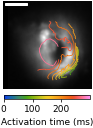

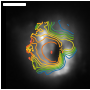

In [46]:
p0 = 5
p1 = 94
vmax = 400
file_name = file_names[1]
for idx, tag in enumerate(["ca", "v"]):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    pc_img = skio.imread(analysis_dir/f"{file_name}_PC1_img.tif")
    pc_img = transform.downscale_local_mean(pc_img, (2,2))
    print(pc_img.shape)
    activation_map = smoothed_ts[f"{file_name}_{tag}"]
    finite_mask = np.isfinite(activation_map)
    fv = activation_map[finite_mask]
    min_cutoff, max_cutoff = np.nanpercentile(np.array([smoothed_ts[f"{file_name}_ca"], smoothed_ts[f"{file_name}_v"]]), [p0, p1])
    print(max_cutoff - min_cutoff)
    Tsmoothed_apod = activation_map - min_cutoff
    Tsmoothed_apod[Tsmoothed_apod < 0] = np.nan
    Tsmoothed_apod[Tsmoothed_apod > max_cutoff - min_cutoff] = np.nan
    
    fig1, ax1 = plt.subplots(figsize=(1.5, 1.5))
    ax1.imshow(transform.rotate(pc_img, 90)[:195,:195], cmap="gray")
    ax1.set_axis_off()
    cs = ax1.contour(transform.rotate(Tsmoothed_apod, 90)[:195,:195],
                     levels=np.linspace(0, 300, 12), cmap="cet_CET_R1", linewidth=0.5)
    visualize.plot_img_scalebar(fig1, ax1, 5, 5, 50, 5, pix_per_um=1/um_per_px, show_label=False)
    plt.tight_layout()
    if idx == 0:
        norm = colors.Normalize(vmin=0, vmax=300)
        cax = fig1.add_axes([0.1, 0, 0.8, 0.035])

#         cax = fig1.add_axes([0.95, 0.1, 0.035, 0.8])
        plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="cet_CET_R1"),
                     cax=cax, label=r"Activation time (ms)", orientation="horizontal", ticks=[0,100, 200])
    plt.savefig(output_datadir/f"../{file_name}_example_activation_map_{tag}.svg", dpi=300)
    


In [13]:
expt_info = pd.read_csv(rootdir/"analysis"/"experiment_data.csv")

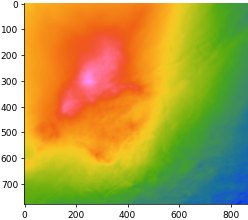

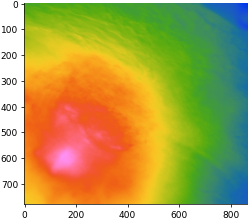

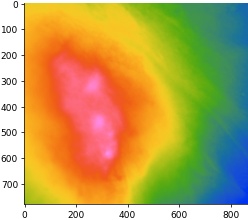

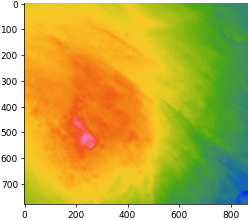

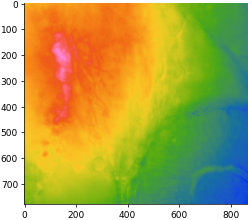

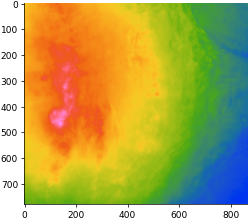

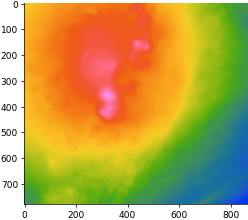

In [54]:
for f in expt_info[expt_info["file_name"].str.contains("P2LR")]["file_name"]:
    img, _ = images.load_image(rootdir, f, subfolder="cam1_registered")
    mean_img = img.mean(axis=0)
    fig1, ax1 = plt.subplots(figsize=(4,4))
    ax1.imshow(mean_img)
    skio.imsave(output_datadir/"mean_voltron_image.tif", mean_img)

In [85]:
expt_info[expt_info["file_name"].str.contains("P2LR")]["file_name"].tolist()

['105642P2LR_D3_20Hz',
 '112058P2LR_D1_20Hz',
 '112954P2LR_E2_20Hz',
 '112641P2LR_C2_20Hz',
 '113631P2LR_E3_20Hz',
 '105233P2LR_F2_20Hz',
 '105922P2LR_F3_20Hz']

In [ ]:
plt.close("all")
file_names = expt_info[expt_info["file_name"].str.contains("P2LR")]["file_name"].tolist()
for idx, file_name in enumerate(file_names):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    
    metadata = utils.load_video_metadata(rootdir, file_name)
    dt_dict, t = utils.traces_to_dict(metadata)
    
    v_dFF = skio.imread(analysis_dir/f"{file_name}_v_dFF_smoothed.tif")
    ca_dFF = skio.imread(analysis_dir/f"{file_name}_ca_dFF_smoothed.tif")
    t = t[1:1+v_dFF.shape[0]]
    dt = np.mean(np.diff(t))
    
    rd = ca_dFF.reshape(ca_dFF.shape[0], -1).T
    u, s, v = randomized_svd(rd, n_components=15)
    pc1 = np.abs(u[:, 0].reshape(ca_dFF.shape[1:]))
    pc1_mask = pc1 > filters.threshold_otsu(pc1)
    skio.imsave(analysis_dir/f"{file_name}_PC1_mask.tif", pc1_mask)
    skio.imsave(analysis_dir/f"{file_name}_PC1_img.tif", pc1)

    ca_trace = images.extract_mask_trace(ca_dFF, pc1_mask)
    v_trace = images.extract_mask_trace(v_dFF, pc1_mask)
    
    fig1, ax1 = plt.subplots(figsize=(4,1))
    ax1.plot(t, ca_trace, color="#44B549")
    ax2 = ax1.twinx()
    ax2.plot(t, v_trace-0.001, color="#7C4491")
    ax1.set_xlim(-8, 55)
    ax1.set_ylim(-0.04, 0.25)
    ax2.set_ylim(-0.001, 0.005)
    
    if idx == 0:
        visualize.plot_scalebars(ax1, scalebar_params, pct_f = True)
    ax1.set_axis_off()
    ax2.set_axis_off()
    plt.savefig(output_datadir/f"../example_dual_trace_cacna1cMO_{idx+1}.svg")

/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(
/tmp/ipykernel_240179/1285876601.py:26: UserWarning: /n/holyscratch01/cohen_lab/bjia/20230323_simultaneous_calcium_voltage/analysis/105642P2LR_D3_20Hz/105642P2LR_D3_20Hz_PC1_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skio.imsave(analysis_dir/f"{file_name}_PC1_mask.tif", pc1_mask)
/tmp/ipykernel_240179/1285876601.py:27: UserWarning: /n/holyscratch01/cohen_lab/bjia/20230323_simultaneous_calcium_voltage/ana

$10\%$
$\Delta F/F$


/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(
/tmp/ipykernel_240179/1285876601.py:26: UserWarning: /n/holyscratch01/cohen_lab/bjia/20230323_simultaneous_calcium_voltage/analysis/112058P2LR_D1_20Hz/112058P2LR_D1_20Hz_PC1_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skio.imsave(analysis_dir/f"{file_name}_PC1_mask.tif", pc1_mask)
/tmp/ipykernel_240179/1285876601.py:27: UserWarning: /n/holyscratch01/cohen_lab/bjia/20230323_simultaneous_calcium_voltage/ana

KeyboardInterrupt: 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x14b277319ee0> (for post_execute):


/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(
/tmp/ipykernel_56157/2953312531.py:28: UserWarning: /n/holyscratch01/cohen_lab/bjia/20230323_simultaneous_calcium_voltage/analysis/094109P2UL_B1_20Hz/094109P2UL_B1_20Hz_PC1_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skio.imsave(analysis_dir/f"{file_name}_PC1_mask.tif", pc1_mask)
/tmp/ipykernel_56157/2953312531.py:29: UserWarning: /n/holyscratch01/cohen_lab/bjia/20230323_simultaneous_calcium_voltage/analy

$10\%$
$\Delta F/F$


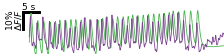

In [90]:
plt.close("all")
file_names = expt_info[expt_info["file_name"].str.contains("P2UL")]["file_name"].tolist()
for idx, file_name in enumerate(file_names[4:5]):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    try:
        metadata = utils.load_video_metadata(rootdir, file_name)
        dt_dict, t = utils.traces_to_dict(metadata)
    except Exception:
        continue
    
    v_dFF = skio.imread(analysis_dir/f"{file_name}_v_dFF_smoothed.tif")
    ca_dFF = skio.imread(analysis_dir/f"{file_name}_ca_dFF_smoothed.tif")
    t = t[1:1+v_dFF.shape[0]]
    dt = np.mean(np.diff(t))
    
    rd = ca_dFF.reshape(ca_dFF.shape[0], -1).T
    u, s, v = randomized_svd(rd, n_components=15)
    pc1 = np.abs(u[:, 0].reshape(ca_dFF.shape[1:]))
    pc1_mask = pc1 > filters.threshold_otsu(pc1)
    skio.imsave(analysis_dir/f"{file_name}_PC1_mask.tif", pc1_mask)
    skio.imsave(analysis_dir/f"{file_name}_PC1_img.tif", pc1)

    ca_trace = images.extract_mask_trace(ca_dFF, pc1_mask)
    v_trace = images.extract_mask_trace(v_dFF, pc1_mask)
    
    fig1, ax1 = plt.subplots(figsize=(4,1))
    ax1.plot(t, ca_trace, color="#44B549")
    ax2 = ax1.twinx()
    ax2.plot(t, v_trace-0.001, color="#7C4491")
    ax1.set_xlim(-8, 55)
    ax1.set_ylim(-0.04, 0.25)
    ax2.set_ylim(-0.001, 0.005)
    
    if idx == 0:
        visualize.plot_scalebars(ax1, scalebar_params, pct_f = True)
    ax1.set_axis_off()
    ax2.set_axis_off()
    plt.savefig(output_datadir/f"../example_dual_trace_cacna1cMO_ctrl_{idx+1}.svg")

Compare peak prominences between control and experiment

In [15]:
all_peak_props = []

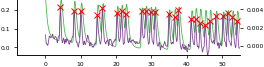

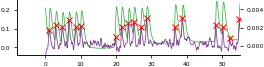

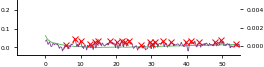

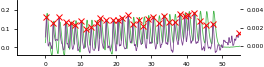

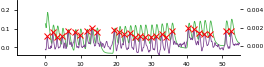

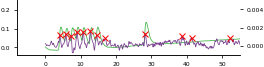

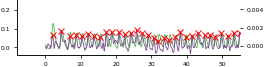

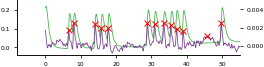

In [16]:
plt.close("all")
file_names = expt_info[expt_info["file_name"].str.contains("P2UL")]["file_name"].tolist()
for idx, file_name in enumerate(file_names):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    try:
        traces_io = np.load(output_datadir/"traces.npz")
    except Exception:
        continue
    
    ca_trace = traces_io["ca_trace"]
    v_trace = traces_io["v_trace"]
    ca_trace_v = traces_io["ca_trace_v"]
    v_trace_v = traces_io["v_trace_v"]
    
    prom_threshold = (np.max(v_trace) - np.min(v_trace))*0.3
    pks, props = signal.find_peaks(v_trace, prominence = prom_threshold)
    props["cacna1c"] = ["Ctrl"]*len(pks)
    props["file_name"] = [file_name]*len(pks)
    all_peak_props.append(props)
    fig1, ax1 = plt.subplots(figsize=(4,1))
    ax1.plot(t, ca_trace, color="#44B549")
    ax2 = ax1.twinx()
    ax2.plot(t, v_trace-0.001, color="#7C4491")
    ax2.plot(t[pks], v_trace[pks]-0.001, "rx")
    ax1.set_xlim(-8, 55)
    ax1.set_ylim(-0.04, 0.25)
    ax2.set_ylim(-0.001, 0.005)
    

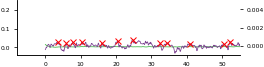

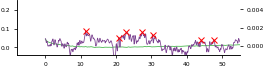

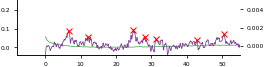

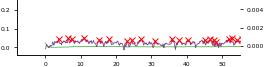

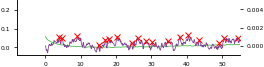

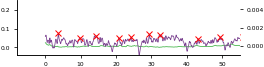

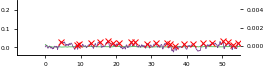

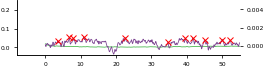

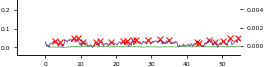

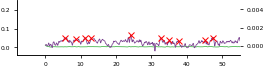

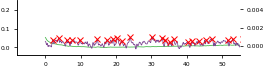

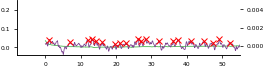

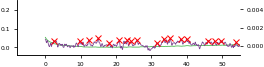

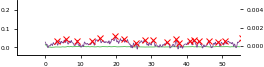

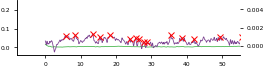

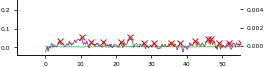

In [17]:
plt.close("all")
file_names = expt_info[expt_info["file_name"].str.contains("P2LR")]["file_name"].tolist() + \
        expt_info[expt_info["file_name"].str.contains("P2LL")]["file_name"].tolist()
for idx, file_name in enumerate(file_names):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    try:
        traces_io = np.load(output_datadir/"traces.npz")
    except Exception:
        continue
    
    ca_trace = traces_io["ca_trace"]
    v_trace = traces_io["v_trace"]
    ca_trace_v = traces_io["ca_trace_v"]
    v_trace_v = traces_io["v_trace_v"]
    
    prom_threshold = (np.max(v_trace) - np.min(v_trace))*0.3
    pks, props = signal.find_peaks(v_trace, prominence = prom_threshold)
    props["cacna1c"] = ["KD"]*len(pks)
    props["file_name"] = [file_name]*len(pks)
    all_peak_props.append(props)
    fig1, ax1 = plt.subplots(figsize=(4,1))
    ax1.plot(t, ca_trace, color="#44B549")
    ax2 = ax1.twinx()
    ax2.plot(t, v_trace-0.001, color="#7C4491")
    ax2.plot(t[pks], v_trace[pks]-0.001, "rx")
    ax1.set_xlim(-8, 55)
    ax1.set_ylim(-0.04, 0.25)
    ax2.set_ylim(-0.001, 0.005)
    

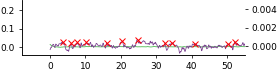

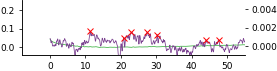

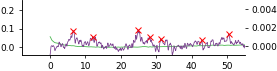

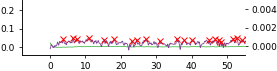

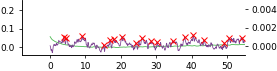

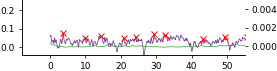

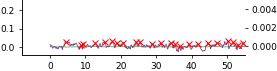

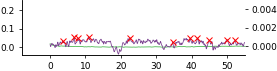

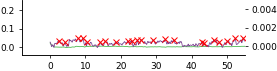

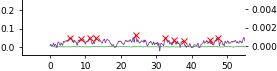

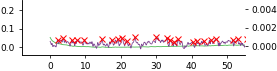

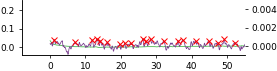

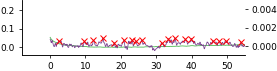

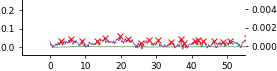

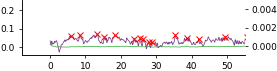

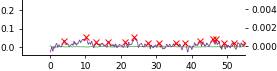

In [57]:
plt.close("all")
file_names = expt_info[expt_info["file_name"].str.contains("P2LR")]["file_name"].tolist() + \
        expt_info[expt_info["file_name"].str.contains("P2LL")]["file_name"].tolist()
for idx, file_name in enumerate(file_names):
    rootdir = Path(DATA_ROOTDIR, expt_name)
    output_datadir = Path(
        ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name,
        file_name,
    )
    analysis_dir = rootdir / "analysis" / file_name
    try:
        traces_io = np.load(output_datadir/"traces.npz")
    except Exception:
        continue
    
    ca_trace = traces_io["ca_trace"]
    v_trace = traces_io["v_trace"]
    ca_trace_v = traces_io["ca_trace_v"]
    v_trace_v = traces_io["v_trace_v"]
    
    prom_threshold = (np.max(v_trace) - np.min(v_trace))*0.3
    pks, props = signal.find_peaks(v_trace, prominence = prom_threshold)
    props["cacna1c"] = ["KD"]*len(pks)
    props["file_name"] = [file_name]*len(pks)
    all_peak_props.append(props)
    fig1, ax1 = plt.subplots(figsize=(4,1))
    ax1.plot(t, ca_trace, color="#44B549")
    ax2 = ax1.twinx()
    ax2.plot(t, v_trace-0.001, color="#7C4491")
    ax2.plot(t[pks], v_trace[pks]-0.001, "rx")
    ax1.set_xlim(-8, 55)
    ax1.set_ylim(-0.04, 0.25)
    ax2.set_ylim(-0.001, 0.005)
    

In [22]:
peaks_df = pd.concat([pd.DataFrame(props) for props in all_peak_props], axis=0)
peaks_df = peaks_df[~peaks_df["file_name"].isna()]

In [23]:
output_datadir = Path(ANAYLSIS_OUTPUT_ROOTDIR,
        "2022 First Heartbeat_Submitted",
        "Figures/Data/Figure3/",
        expt_name)
peaks_df.to_csv(output_datadir/f"cacna1c_kd_peaks.csv", index=False)
peaks_df = pd.read_csv(output_datadir/f"cacna1c_kd_peaks.csv")

In [24]:
median_proms = peaks_df.groupby(["cacna1c", "file_name"])["prominences"].median().reset_index()
median_proms["prominences"]*=100

In [25]:
median_proms.groupby("cacna1c").count()

,file_name,prominences
cacna1c,,
Ctrl,8,8
KD,16,16


In [8]:
print(stats.shapiro(median_proms.set_index("cacna1c").loc["KD", "prominences"]))

ShapiroResult(statistic=0.9209693670272827, pvalue=0.4769607484340668)


In [64]:
print(stats.shapiro(median_proms.set_index("cacna1c").loc["Ctrl", "prominences"]))

ShapiroResult(statistic=0.9784159064292908, pvalue=0.9546443819999695)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ctrl vs. KD: Mann-Whitney-Wilcoxon test two-sided, P_val:2.162e-03 U_stat=1.120e+02


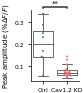

In [28]:
x = "cacna1c"
y = "prominences"
fig1, ax1 = plt.subplots(figsize=(1.3, 1.5))
sns.boxplot(data=median_proms, x=x, y=y, boxprops={
        "facecolor": "w",
    },fliersize=0, ax = ax1)
sns.swarmplot(data=median_proms, x=x, y=y, ax = ax1, size=2)
ax1.set_ylabel(r"Peak amplitude (%$\Delta F / F$)")
ax1.set_xlabel(r"")
ax1.set_xticklabels(["Ctrl", "Cav1.2 KD"])
pairs = [("Ctrl", "KD")]
annot = Annotator(ax1, pairs, data=median_proms, x=x,y=y)
annot.configure(test="Mann-Whitney", verbose=2, loc="outside")
annot.apply_and_annotate()

plt.tight_layout()
plt.savefig(output_datadir/f"cacna1c_amplitude_comparison.svg")

In [143]:
peaks_df.to_csv(output_datadir/f"../cacna1c_kd_peaks.csv", index=False)